<a href="https://colab.research.google.com/github/IsaAfonsoCollares/Pos-Graduacao-em-Ciencias-de-Dados-Mackenzie/blob/main/T6_aprofundamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
#packages
!pip install unidecode
!pip install fraction

# Load EDA Pkgs
import pandas as pd
import numpy as np
import random

# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('rslp')

#charts & others stuff
from unidecode import unidecode
import matplotlib.pyplot as plt
import re
import string
from fractions import Fraction
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


<Axes: ylabel='Frequency'>

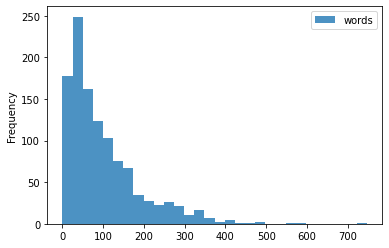

In [83]:
df = pd.read_csv("https://raw.githubusercontent.com/IsaAfonsoCollares/Pos-Graduacao-em-Ciencias-de-Dados-Mackenzie/main/Imdb_Reviews/reviews.csv")
df = df.drop(columns='rating')
#Faz a contagem de palavras por cada linha do artigo
df['words'] = df['text'].str.split().str.len()
df.plot.hist(bins=30, alpha=0.8)

In [88]:
stop = stopwords.words('english')
tirar = ['movie','film', 'cidade', 'city','god','de','deus', 'one', 'see', 'films', 'seen']
stop = stop + tirar
stop2 = list()
for word in stop:
  stop2.append(unidecode(word))


In [89]:
# remoção de palavras de parada
df['treated_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Transforma em minuscula e remoção de acentos 
df['treated_text'] = df['treated_text'].str.lower().apply(lambda x: unidecode(x))

# remocação de pontuaçao
df['treated_text'] = df['treated_text'].str.replace('[{}]'.format(string.punctuation), ' ')

# remocação de numeros
df['treated_text'] = df['treated_text'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada (repescagem)
df['treated_text'] = df['treated_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))


<ipython-input-89-acc8adc73346>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['treated_text'] = df['treated_text'].str.replace('[{}]'.format(string.punctuation), ' ')
<ipython-input-89-acc8adc73346>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['treated_text'] = df['treated_text'].str.replace('[{}]'.format(string.digits), '')


array([[<Axes: title={'center': 'words'}>,
        <Axes: title={'center': 'words_treated'}>]], dtype=object)

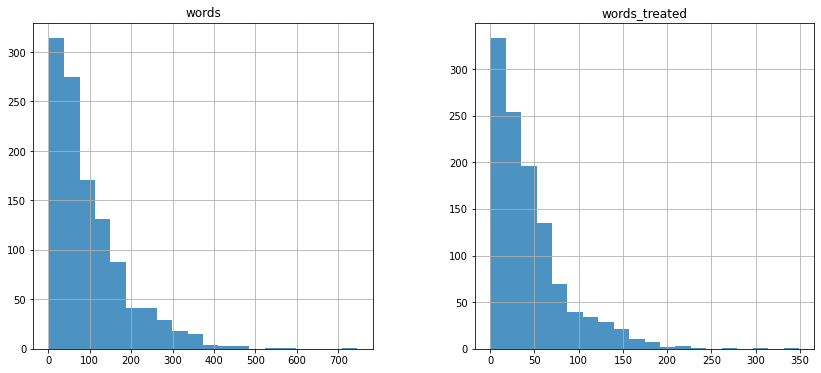

In [90]:
#Plota o DataFrame em histograma para uma avaliação
#Faz a contagem de palavras por cada linha do artigo
df['words_treated'] = df['treated_text'].str.split().str.len()
df.hist(bins=20, alpha=0.8, figsize=(14,6))

<function matplotlib.pyplot.show(close=None, block=None)>

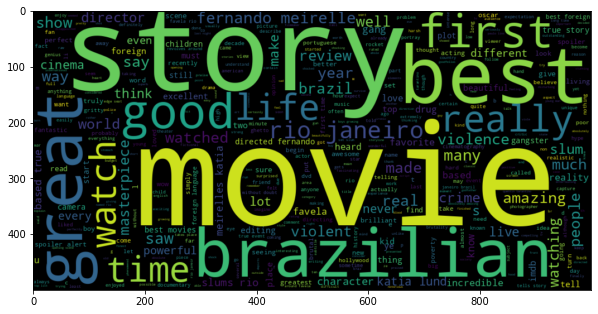

In [91]:
texto =' '.join(df['treated_text'])

mydict = {} 
words = texto.split() 

for word in words:               
  if word not in mydict.keys():        
    mydict[word] = 1                    # acrescenta a word com o valor 1
  else:                                 # se a entrada já existe 
    mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

sorted_my_dict = sorted(mydict.items(), key=lambda x: x[1], reverse=True)
top_30 = sorted_my_dict[0:30]
top_30words = ""
for item in top_30:
  top_word= item[0]
  top_30words = top_30words + top_word

#word cloud
plt.figure(figsize=(10,10))
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
words=WC.generate(df['treated_text'].to_string())
plt.imshow(words,interpolation='bilinear')
plt.show#